#### Import python files from another directory
In order to reuse code written in .py files you need to import them.
If they are from a distant folder, rather than copy-paste it into the current folder, you can write:

In [4]:
import sys

sys.path.append(
    "../ex02/"
)  # This goes up twice in the directories tree (hence in labs)
# then goes down to ex02/template where your files from lab 2 are.

you can now import your desired files, for example, we can import grid_search.py with:

In [11]:
import grid_search as gs
import costs as ct

# Let's try to call generate_w from grid_search.py:
w0, w1 = generate_w(5)
print(w0, w1)

[-100.  -25.   50.  125.  200.] [-150.  -75.    0.   75.  150.]


As you can see we are now able to call functions from the grid_search.py file.

In [6]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *

from test_utils import test

%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [12]:
def least_squares(y, tx):
    """Calculate the least squares solution.
       returns mse, and optimal weights.

    Args:
        y: numpy array of shape (N,), N is the number of samples.
        tx: numpy array of shape (N,D), D is the number of features.

    Returns:
        w: optimal weights, numpy array of shape(D,), D is the number of features.
        mse: scalar.

    >>> least_squares(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]))
    (array([ 0.21212121, -0.12121212]), 8.666684749742561e-33)
    """

    # Obtain w using the normal equations formula
    y = y.reshape(-1, 1) # reshape y into a column matrix
    w = (np.linalg.inv(tx.T @ tx) @ tx.T @ y).flatten()

    # Obtain MSE
    mse = ct.compute_loss(y, tx, w)

    return w, mse

### You can test your implementation here

In [13]:
test(least_squares)
# NB:
#
# Due to precision issues,
# the output might not be exactly the same
# even if you have implemented the right code.
#
# For example, the mse output expected to be
# 8.666684749742561e-33,
# but you might get some other small number
# close to zero.
#
# In this case,
# Failing the test doesn't necessarily means
# your implementation is wrong.:)

❌ The are some issues with your implementation of `least_squares`:
**********************************************************************
File "__main__", line 13, in least_squares
Failed example:
    least_squares(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]))
Expected:
    (array([ 0.21212121, -0.12121212]), 8.666684749742561e-33)
Got:
    (array([ 0.21212121, -0.12121212]), 0.019999999999999962)
**********************************************************************


### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [24]:
def test_your_least_squares():
    """
    # this code should compare the optimal weights obtained
    # by least squares vs. grid search
    """
    # Prepare the data
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)

    # Find the optimal solution using grid search
    w0, w1 = gs.generate_w(10) # generate 5 possible weights for each regressor
    losses = gs.grid_search(y, tx, w0, w1)
    mse, w0, w1 = gs.get_best_parameters(w0, w1, losses)
    print(f"GS: MSE = {mse}, W0 = {w0} W1 = {w1}")

    # Find the optimal solution using least squares
    w, mse = least_squares(y, tx)
    w0, w1 = list(w)
    print(f"LS: MSE = {mse}, W0 = {w0} W1 = {w1}") 

Test it here

In [25]:
test_your_least_squares()

GS: MSE = 4242448314.6782475, W0 = 66.66666666666669 W1 = 16.666666666666686
LS: MSE = 197088535198827.4, W0 = 73.29392200210519 W1 = 13.479712434989047


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [26]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [27]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree.

    Args:
        x: numpy array of shape (N,), N is the number of samples.
        degree: integer.

    Returns:
        poly: numpy array of shape (N,d+1)

    >>> build_poly(np.array([0.0, 1.5]), 2)
    array([[1.  , 0.  , 0.  ],
           [1.  , 1.5 , 2.25]])
    """

    n = x.shape[0]
    poly = np.empty((n, degree + 1))
    for j in range(degree + 1):
       poly[:, j] = x**j

    return poly

In [28]:
test(build_poly)

✅ Your `build_poly` passed 1 tests.


Once your implementation of `build_poly` passes the test, copy it to `build_polynomial.py`
Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [29]:
from plots import *


def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
    and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    x, y = load_data()

    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):

        tx = build_poly(x, degree)
        weights, mse = least_squares(y, tx)
        rmse = np.sqrt(2* mse)

        print(
            "Processing {i}th experiment, degree={d}, rmse={loss}".format(
                i=ind + 1, d=degree, loss=rmse
            )
        )
        # plot fit
        plot_fitted_curve(y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()

    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=312.15437010902707
Processing 2th experiment, degree=3, rmse=341.92923031709483
Processing 3th experiment, degree=7, rmse=342.75727720030613
Processing 4th experiment, degree=12, rmse=397.1111176165452


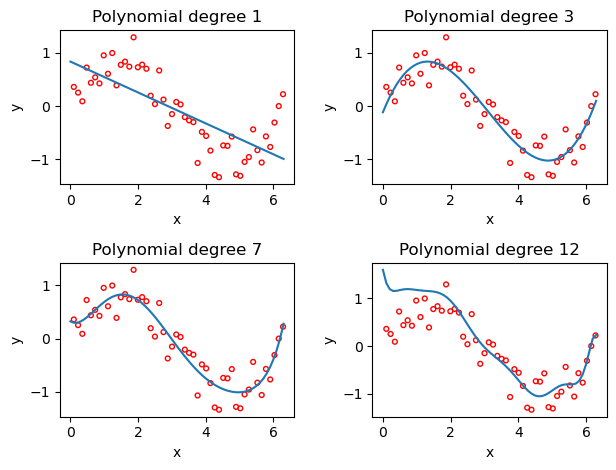

In [30]:
polynomial_regression()

Your results should look like this:

![alt text](visualize_polynomial_regression.png)

# 2 Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [37]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8
    you will have 80% of your data set dedicated to training
    and the rest dedicated to testing. If ratio times the number of samples is not round
    you can use np.floor. Also check the documentation for np.random.permutation,
    it could be useful.

    Args:
        x: numpy array of shape (N,), N is the number of samples.
        y: numpy array of shape (N,).
        ratio: scalar in [0,1]
        seed: integer.

    Returns:
        x_tr: numpy array containing the train data.
        x_te: numpy array containing the test data.
        y_tr: numpy array containing the train labels.
        y_te: numpy array containing the test labels.

    >>> split_data(np.arange(13), np.arange(13), 0.8, 1)
    (array([ 2,  3,  4, 10,  1,  6,  0,  7, 12,  9]), array([ 8, 11,  5]), array([ 2,  3,  4, 10,  1,  6,  0,  7, 12,  9]), array([ 8, 11,  5]))
    """
    # set seed
    np.random.seed(seed)

    # get indices
    n = x.shape[0]
    ix = np.arange(0, n)
    ix = np.random.permutation(ix)

    # split the data
    train_n = int(n*ratio)
    # - Train
    train_ix = ix[:train_n]
    x_tr = x[train_ix]
    y_tr = y[train_ix]
    # - Test
    test_ix = ix[train_n:]
    x_te = x[test_ix]
    y_te = y[test_ix]

    return x_tr, x_te, y_tr, y_te

In [38]:
test(split_data)

✅ Your `split_data` passed 1 tests.


Then, test your `split_data` function below.

In [44]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees.

    Returns:
      x_tr: numpy array
      x_te: numpy array
      y_tr: numpy array
      y_te: numpy array
      weights: weights from the least squares optimization"""

    # Load and split the data
    x, y = load_data()
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)

    # Get poly features
    x_tr_poly, x_te_poly = build_poly(x_tr, degree), build_poly(x_te, degree)
    
    # Fit the model using OLS
    w, mse_tr = least_squares(y_tr, x_tr_poly)
    mse_te = ct.compute_loss(y_te, x_te_poly, w)
    
    # Calculate the rmse for train and test data
    rmse_tr, rmse_te = np.sqrt(2 * mse_tr), np.sqrt(2 * mse_te)
    print(
        "proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
            p=ratio, d=degree, tr=rmse_tr, te=rmse_te
        )
    )

    return x_tr, x_te, y_tr, y_te, w

Demo time

proportion=0.9, degree=1, Training RMSE=275.617, Testing RMSE=0.906
proportion=0.9, degree=3, Training RMSE=303.025, Testing RMSE=1.032
proportion=0.9, degree=7, Training RMSE=303.835, Testing RMSE=1.098
proportion=0.9, degree=12, Training RMSE=1065.356, Testing RMSE=17.443
proportion=0.7, degree=1, Training RMSE=203.894, Testing RMSE=5.273
proportion=0.7, degree=3, Training RMSE=224.348, Testing RMSE=4.627
proportion=0.7, degree=7, Training RMSE=225.331, Testing RMSE=4.998
proportion=0.7, degree=12, Training RMSE=440.680, Testing RMSE=18.817
proportion=0.5, degree=1, Training RMSE=128.475, Testing RMSE=13.270
proportion=0.5, degree=3, Training RMSE=137.278, Testing RMSE=7.411
proportion=0.5, degree=7, Training RMSE=137.449, Testing RMSE=7.103
proportion=0.5, degree=12, Training RMSE=146.429, Testing RMSE=39.593
proportion=0.1, degree=1, Training RMSE=12.050, Testing RMSE=24.033
proportion=0.1, degree=3, Training RMSE=12.929, Testing RMSE=20.695
proportion=0.1, degree=7, Training RMSE=

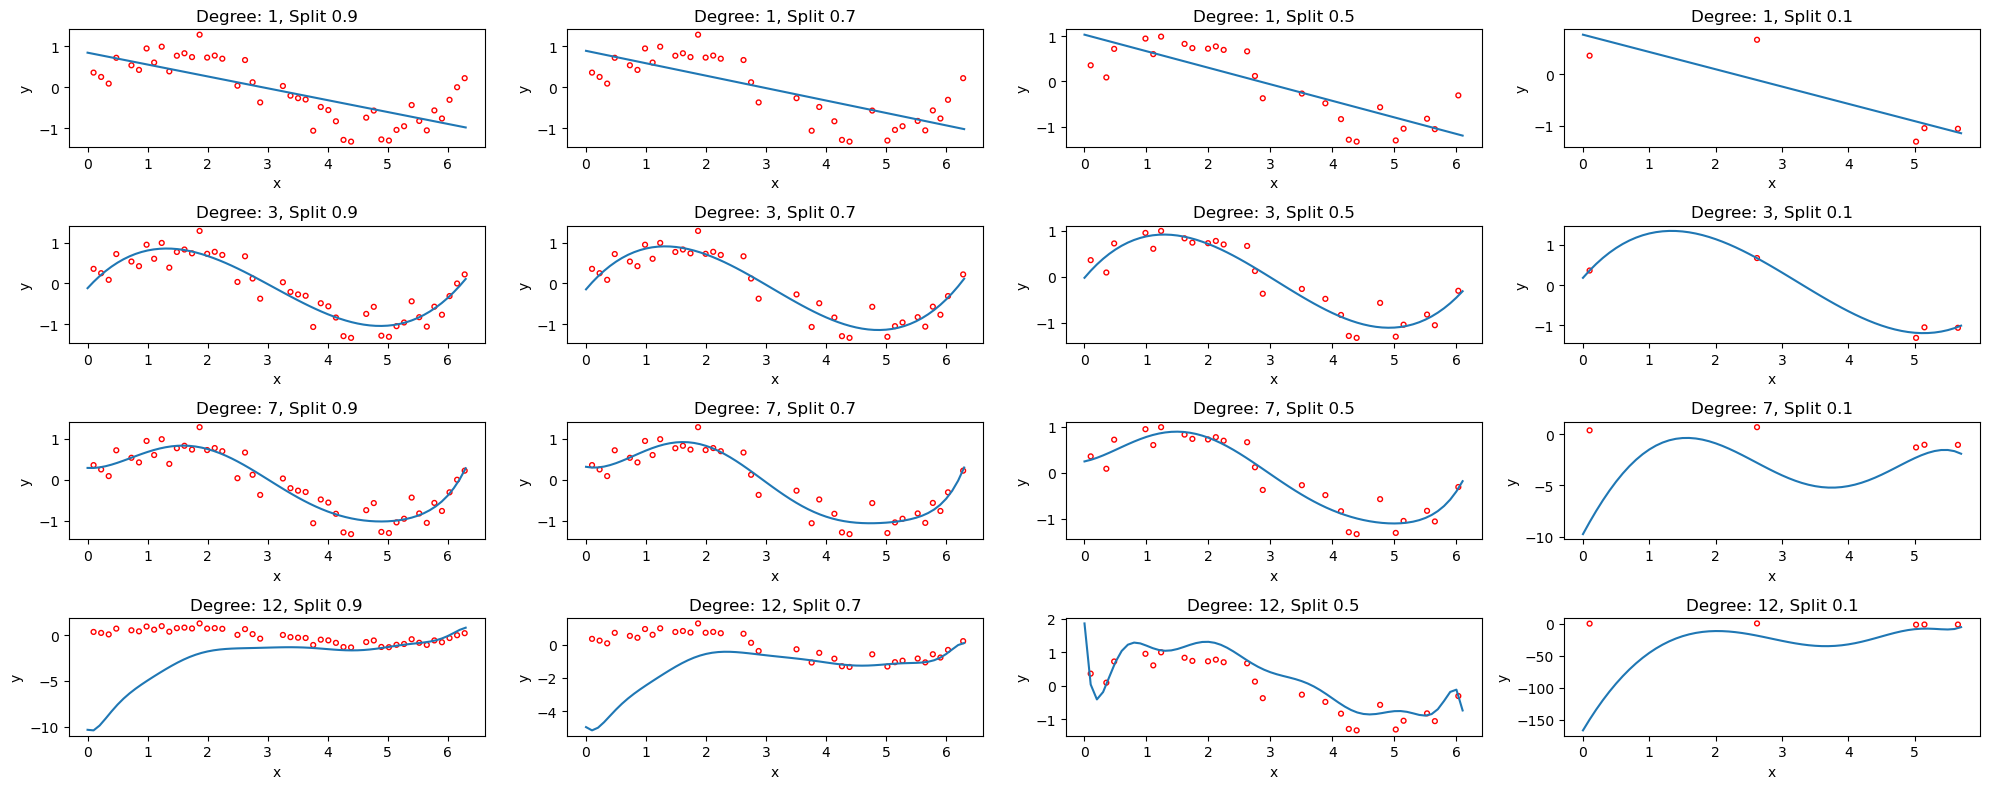

In [45]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.7, 0.5, 0.1]

# define the structure of the figure
num_row = 4
num_col = 4
axs = plt.subplots(num_row, num_col, figsize=(20, 8))[1]

for ind, split_ratio in enumerate(split_ratios):
    for ind_d, degree in enumerate(degrees):
        x_tr, x_te, y_tr, y_te, w = train_test_split_demo(
            x, y, degree, split_ratio, seed
        )
        #print(x_tr.shape, y_tr.shape)
        plot_fitted_curve(y_tr, x_tr, w, degree, axs[ind_d][ind % num_col])
        axs[ind_d][ind].set_title(f"Degree: {degree}, Split {split_ratio}")
plt.tight_layout()

Your graph should look like this:

![alt text](split_demo.png)

# Ridge Regression
Please fill in the function below.

In [76]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression.

    Args:
        y: numpy array of shape (N,), N is the number of samples.
        tx: numpy array of shape (N,D), D is the number of features.
        lambda_: scalar.

    Returns:
        w: optimal weights, numpy array of shape(D,), D is the number of features.

    >>> ridge_regression(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]), 0)
    array([ 0.21212121, -0.12121212])
    >>> ridge_regression(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]), 1)
    array([0.03947092, 0.00319628])
    """
    n, p = tx.shape
    y = y.reshape(-1, 1)
    #lamba_ = 2*n*lambda_
    w_ridge = np.linalg.inv(tx.T @ tx + lambda_ * np.identity(p)) @ tx.T @ y
    return w_ridge.flatten()

In [77]:
test(ridge_regression)

❌ The are some issues with your implementation of `ridge_regression`:
**********************************************************************
File "__main__", line 14, in ridge_regression
Failed example:
    ridge_regression(np.array([0.1,0.2]), np.array([[2.3, 3.2], [1., 0.1]]), 1)
Expected:
    array([0.03947092, 0.00319628])
Got:
    array([ 0.08729216, -0.02766218])
**********************************************************************


In [80]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)

    rmse_tr = []
    rmse_te = []
    # Load and split the data
    x, y = load_data()
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    # Get poly features
    x_tr_poly, x_te_poly = build_poly(x_tr, degree), build_poly(x_te, degree)
    
    for ind, lambda_ in enumerate(lambdas):
      
        # Fit the model using OLS
        w = ridge_regression(y_tr, x_tr_poly, lambda_)
        rmse = lambda x: np.sqrt(2 * x)
        mse_tr, mse_te = (
            ct.compute_loss(y_tr, x_tr_poly, w) + lambda_*((w**2).sum()), 
            ct.compute_loss(y_te, x_te_poly, w) + lambda_*((w**2).sum())
        )
        rmse_tr.append(rmse(mse_tr))
        rmse_te.append(rmse(mse_te))
 
        print(
            "proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
                p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]
            )
        )
        
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

Demo time

proportion=0.5, degree=7, lambda=0.000, Training RMSE=5.681, Testing RMSE=8.459
proportion=0.5, degree=7, lambda=0.000, Training RMSE=5.681, Testing RMSE=8.458
proportion=0.5, degree=7, lambda=0.000, Training RMSE=5.681, Testing RMSE=8.455
proportion=0.5, degree=7, lambda=0.000, Training RMSE=5.681, Testing RMSE=8.453
proportion=0.5, degree=7, lambda=0.000, Training RMSE=5.681, Testing RMSE=8.451
proportion=0.5, degree=7, lambda=0.000, Training RMSE=5.681, Testing RMSE=8.448
proportion=0.5, degree=7, lambda=0.000, Training RMSE=5.681, Testing RMSE=8.446
proportion=0.5, degree=7, lambda=0.000, Training RMSE=5.681, Testing RMSE=8.444
proportion=0.5, degree=7, lambda=0.000, Training RMSE=5.681, Testing RMSE=8.441
proportion=0.5, degree=7, lambda=0.001, Training RMSE=5.681, Testing RMSE=8.436
proportion=0.5, degree=7, lambda=0.001, Training RMSE=5.682, Testing RMSE=8.429
proportion=0.5, degree=7, lambda=0.002, Training RMSE=5.682, Testing RMSE=8.419
proportion=0.5, degree=7, lambda=0.003, 

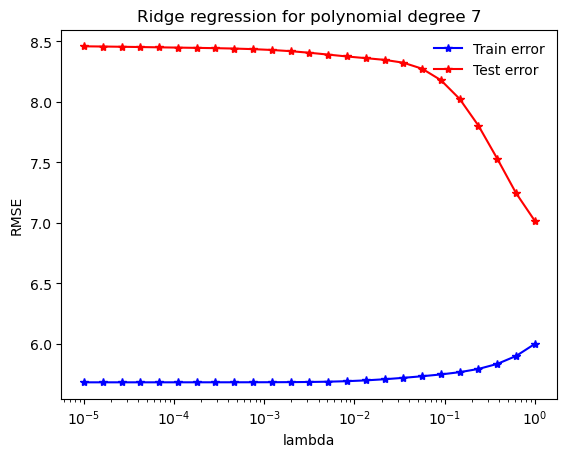

In [81]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

Your plot should look like:

![alt text](ridge_regression.png)